In [ ]:
"""
Gun Violence dataset: https://www.kaggle.com/datasets/whisperingkahuna/gunviolence1
"""
import pandas as pd
import numpy as np


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving gun_violence.csv to gun_violence.csv


In [ ]:
# df = pd.read_csv("data.csv", names = ["Title", "Type", "Genres","releaseYear", "imdbId", "imdbAverageRatio", "imdbNumVotes", "availableCountries"])
df = pd.read_csv("gun_violence.csv")
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,NaN,47.56812,-121.89086,Yes
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,NaN,35.61390,-88.81940,Yes
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,NaN,30.44335,-91.18664,Yes
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,NaN,39.95222,-75.16218,Yes
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,NaN,33.11464,-90.05281,Yes


In [ ]:
#check null values
df.isnull().sum()

,0
Incident ID,0
Incident Date,0
State,0
City Or County,0
Address,1
Victims Killed,0
Victims Injured,0
Suspects Killed,0
Suspects Injured,0
Suspects Arrested,0


In [ ]:
#check the features
print(df.columns)

Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       'Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Suspects Arrested', 'Operations', 'Latitude',
       'Longitude', 'Coordinates_Found'],
      dtype='object')


In [ ]:
#check unique values of the "to be predicted" column, and other potentially unuseful columns
print(df['Victims Killed'].unique())
print(df['Operations'].unique())
print(df['Coordinates_Found'].unique())

[5 1 0 3 2 4 6 8]
[nan]
['Yes']


In [ ]:
#check the data types for the columns
df.dtypes

,0
Incident ID,int64
Incident Date,object
State,object
City Or County,object
Address,object
Victims Killed,int64
Victims Injured,int64
Suspects Killed,int64
Suspects Injured,int64
Suspects Arrested,int64


In [ ]:
"""
I will use 'State', 'City Or County',
       'Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Latitude',
       'Longitude'
       to predict 'Suspects Arrested',
       other factors are either not helpful or not available in the dataset.
"""

In [ ]:
#Transform States to numerical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['State_encoded'] = label_encoder.fit_transform(df['State'])
print(df[['State', 'State_encoded']].head())

State_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("State Mapping:", State_mapping)

          State  State_encoded
0    Washington             40
1     Tennessee             36
2     Louisiana             17
3  Pennsylvania             33
4   Mississippi             23
State Mapping: {'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'District of Columbia': 8, 'Florida': 9, 'Georgia': 10, 'Hawaii': 11, 'Illinois': 12, 'Indiana': 13, 'Iowa': 14, 'Kansas': 15, 'Kentucky': 16, 'Louisiana': 17, 'Maine': 18, 'Maryland': 19, 'Massachusetts': 20, 'Michigan': 21, 'Minnesota': 22, 'Mississippi': 23, 'Missouri': 24, 'Nebraska': 25, 'Nevada': 26, 'New Jersey': 27, 'New Mexico': 28, 'New York': 29, 'North Carolina': 30, 'Ohio': 31, 'Oklahoma': 32, 'Pennsylvania': 33, 'South Carolina': 34, 'South Dakota': 35, 'Tennessee': 36, 'Texas': 37, 'Utah': 38, 'Virginia': 39, 'Washington': 40, 'West Virginia': 41, 'Wisconsin': 42}


In [ ]:
#Transform Cities to numerical values

df['City Or County_encoded'] = label_encoder.fit_transform(df['City Or County'])
print(df[['City Or County', 'City Or County_encoded']].head())

CityOrCounty_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("City Or County Mapping:", CityOrCounty_mapping)

  City Or County  City Or County_encoded
0      Fall City                      66
1        Jackson                      93
2    Baton Rouge                      12
3   Philadelphia                     155
4      Lexington                     108
City Or County Mapping: {'Abbeville': 0, 'Adelanto': 1, 'Akron': 2, 'Alameda': 3, 'Albany': 4, 'Allentown': 5, 'Anderson': 6, 'Antioch': 7, 'Atlanta': 8, 'Auburn': 9, 'Aurora': 10, 'Baltimore': 11, 'Baton Rouge': 12, 'Bessemer': 13, 'Birmingham': 14, 'Boston': 15, 'Bridgeport': 16, 'Bridgeton': 17, 'Bronx': 18, 'Brooklyn': 19, 'Buffalo': 20, 'Burnsville': 21, 'Burton': 22, 'Butler': 23, 'Canton': 24, 'Carson': 25, 'Champaign': 26, 'Charleston': 27, 'Charlotte': 28, 'Chester': 29, 'Chicago': 30, 'Cincinnati': 31, 'Clarksdale': 32, 'Claxton': 33, 'Cleveland': 34, 'Cleveland (East Cleveland)': 35, 'Clinton': 36, 'Coker': 37, 'Coldwater': 38, 'Colorado Springs': 39, 'Columbus': 40, 'Compton': 41, 'Coraopolis': 42, 'Corona (Queens)': 43, 'Corpus Chr

In [ ]:
#new df with the two encoded columns
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found,State_encoded,City Or County_encoded
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,NaN,47.56812,-121.89086,Yes,40,66
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,NaN,35.61390,-88.81940,Yes,36,93
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,NaN,30.44335,-91.18664,Yes,17,12
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,NaN,39.95222,-75.16218,Yes,33,155
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,NaN,33.11464,-90.05281,Yes,23,108


b, 7 points) Try predicting your target variable using a RandomForestClassifier from scikit-learn, with all the other numerical features in the dataset as your features.  You can create a dataframe that includes just your numeric features with df.select_dtypes(include='number'), and drop your target (to-be-predicted) column from your features if you need to with df = df.drop(columns=['target']).  (The suggested dataset should also drop the first 'Unnamed' column - that row number predicts the genre number pretty well in that dataset!)  Use a train-test split with 10% of the data in the test set, and evaluate the accuracy on the test set.

In [ ]:
#drop the two unhelpful numerical columns
df = df.drop(columns=['Incident ID'])
df = df.drop(columns=['Operations'])

In [ ]:
# TODO
# Create a data frame with only useful numeric features, ndf
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



ndf = df.select_dtypes(include='number')
print(ndf.columns)
ndf.head()

Index(['Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Suspects Arrested', 'Latitude', 'Longitude',
       'State_encoded', 'City Or County_encoded'],
      dtype='object')


,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Latitude,Longitude,State_encoded,City Or County_encoded
0,5,1,0,0,1,47.56812,-121.89086,40,66
1,1,8,0,0,0,35.61390,-88.81940,36,93
2,0,5,0,0,0,30.44335,-91.18664,17,12
3,0,7,0,0,0,39.95222,-75.16218,33,155
4,3,8,0,0,0,33.11464,-90.05281,23,108


In [ ]:
#drop the target column "Suspects Arrested"
X = ndf.drop(columns=['Victims Killed'])
y = ndf['Victims Killed']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6511627906976745

c, 4 points) Choose one argument to RandomForestClassifier besides n_estimators that you vary to try to improve your classifier's accuracy.  (See documentation here:  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  Train three different classifiers with different values for this parameter, counting the one you already trained.

In [ ]:
# TODO variation 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
clf2 = RandomForestClassifier(criterion = "entropy", random_state=0)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.627906976744186

In [ ]:
# TODO variation 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
clf3 = RandomForestClassifier(max_features="log2", random_state=0)
clf3.fit(X_train, y_train)
clf3.score(X_test, y_test)

0.6744186046511628

d, 2 points) Use the *_feature_importances* attribute of the RandomForestClassifier to find the relative importances of all your features in your best model.

In [ ]:
# TODO
feature_importances = pd.Series(clf3.feature_importances_, index=X.columns).sort_values(ascending=False)
print(f"Feature Importances: \n{feature_importances}")

Feature Importances: 
Victims Injured           0.435894
Latitude                  0.130883
Longitude                 0.125407
City Or County_encoded    0.123784
State_encoded             0.089237
Suspects Arrested         0.054771
Suspects Killed           0.026575
Suspects Injured          0.013449
dtype: float64


e, up to 8 points EC) In this step, perform some additional analysis of your choice on your dataset, such as looking at correlations, performing statistical tests, or training a different machine learning classifier or regression.  You could also plot data for credit, using scatter plots, bar charts, or other visualizations.  Choose your methods with an eye toward being interesting for step (f).  This step is extra credit.

In [ ]:
# maybe-TODO anything here:  correlations, statistical tests, other machine learning...
ndf.describe()

,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Latitude,Longitude,State_encoded,City Or County_encoded
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,1.000000,4.437939,0.070258,0.063232,0.711944,36.941819,-88.791959,20.562061,108.100703
std,1.210285,2.849555,0.264896,0.271030,1.178414,4.934289,12.976850,12.305683,66.729126
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.449910,-166.739450,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,33.449545,-91.910580,10.000000,46.000000
50%,1.000000,4.000000,0.000000,0.000000,0.000000,37.687490,-86.811790,21.000000,110.000000
75%,1.000000,5.000000,0.000000,0.000000,1.000000,40.692450,-80.735325,32.000000,157.500000
max,8.000000,28.000000,2.000000,2.000000,7.000000,68.349440,-70.256650,42.000000,234.000000


In [ ]:
ndf.corr(numeric_only=True)

,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Latitude,Longitude,State_encoded,City Or County_encoded
Victims Killed,1.000000,-0.268858,0.256269,0.042938,0.060899,-0.062537,-0.137818,-0.110015,0.009098
Victims Injured,-0.268858,1.000000,-0.037748,0.158586,0.115951,0.005662,0.040184,0.012110,-0.040935
Suspects Killed,0.256269,-0.037748,1.000000,-0.062023,-0.138055,-0.006468,-0.012432,0.044747,0.013012
Suspects Injured,0.042938,0.158586,-0.062023,1.000000,0.314406,-0.089025,-0.053684,-0.050096,0.057276
Suspects Arrested,0.060899,0.115951,-0.138055,0.314406,1.000000,-0.170468,-0.112181,-0.054207,0.007922
Latitude,-0.062537,0.005662,-0.006468,-0.089025,-0.170468,1.000000,0.037373,0.194464,-0.128347
Longitude,-0.137818,0.040184,-0.012432,-0.053684,-0.112181,0.037373,1.000000,0.221370,-0.047204
State_encoded,-0.110015,0.012110,0.044747,-0.050096,-0.054207,0.194464,0.221370,1.000000,-0.024185
City Or County_encoded,0.009098,-0.040935,0.013012,0.057276,0.007922,-0.128347,-0.047204,-0.024185,1.000000


In [ ]:
"""
From the correlation table and the feature importance analysis, we can see that
"Victims Injured" and "Suspects Killed" are the most associated features to our
target variable "Victims Killed". Next we will run regression
to visualize how well do they hint toward our target variable.
"""

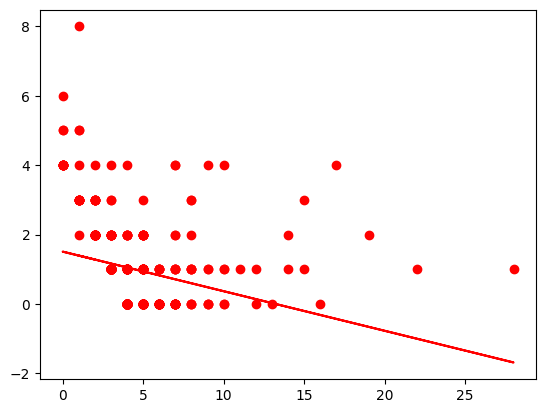

0.07228460430388028

In [ ]:
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression

vkilled = ndf.loc[:, "Victims Killed"]
vinjured = ndf.loc[:, "Victims Injured"]

linear_model = LinearRegression()

x = vinjured.values.reshape(-1, 1)
y = vkilled
linear_model.fit(x,y)
y_hat = linear_model.predict(x)
plt.plot(x,y,'ro')
plt.plot(x,y_hat,'r')
plt.show()
linear_model.score(x,y)

In [ ]:
# from sklearn.tree import DecisionTreeRegressor

# sdf = ndf.sort_values(by='Victims Injured')

# vkilled = sdf.loc[:, "Victims Killed"]
# vinjured = sdf.loc[:, "Victims Injured"]
# skilled = sdf.loc[:, "Suspects Killed"]

# model = DecisionTreeRegressor()
# x = vinjured.values.reshape(-1, 1)
# y = vkilled

# xtrain = x[:400]
# ytrain = y[:400]
# model.fit(xtrain,ytrain)
# yhat = model.predict(x)
# plt.plot(x,y,'o')
# plt.plot(x[:400],yhat[:400])
# plt.plot(x[399:],yhat[399:],'r') # Plot line to test predictions in red
# plt.show()

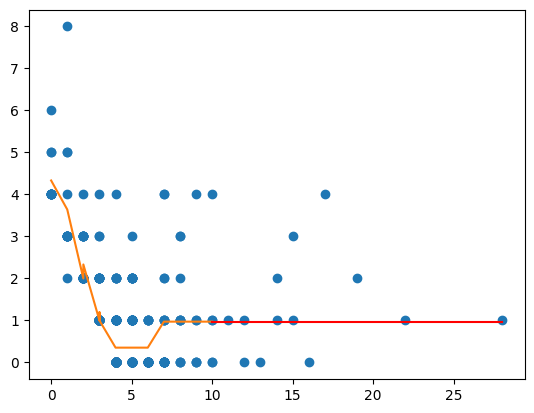

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth =3)

sdf = ndf.sort_values(by='Victims Injured')

vkilled = sdf.loc[:, "Victims Killed"]
vinjured = sdf.loc[:, "Victims Injured"]

x = vinjured.values.reshape(-1, 1)
y = vkilled.values

prev_value_features = [0] + y[:-1].tolist()
prev_value_features = np.array(prev_value_features).reshape(-1, 1)
combined_features = np.column_stack((x, prev_value_features))
xtrain = combined_features[:410,:]
model.fit(xtrain,ytrain)
yhat = model.predict(combined_features)
plt.plot(x,y,'o')
plt.plot(x[:410],yhat[:410])
plt.plot(x[410:],yhat[410:],'r')
plt.show()

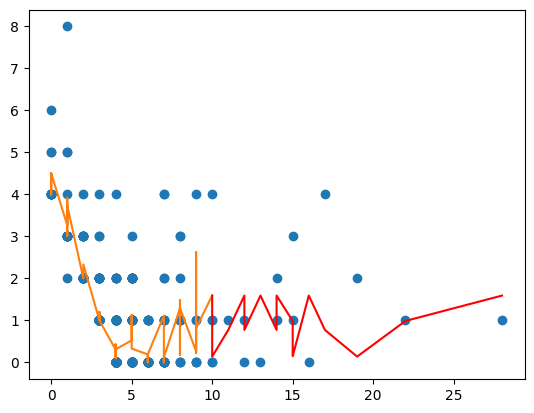

In [ ]:
from sklearn.ensemble import RandomForestRegressor
sdf = ndf.sort_values(by='Victims Injured')

vkilled = sdf.loc[:, "Victims Killed"]
vinjured = sdf.loc[:, "Victims Injured"]

x = vinjured.values.reshape(-1, 1)
y = vkilled.values
prev_value_features = [0] + y[:-1].tolist()
prev_value_features = np.array(prev_value_features).reshape(-1, 1)
combined_features = np.column_stack((x, prev_value_features))
xtrain = combined_features[:410, :]
ytrain = y[:410]

model = RandomForestRegressor()
model.fit(xtrain,ytrain) # xtrain has the matrix we made in the previous code box
yhat = model.predict(combined_features)
plt.plot(x,y,'o')
plt.plot(x[:410],yhat[:410])
plt.plot(x[410:],yhat[410:],'r')
plt.show()

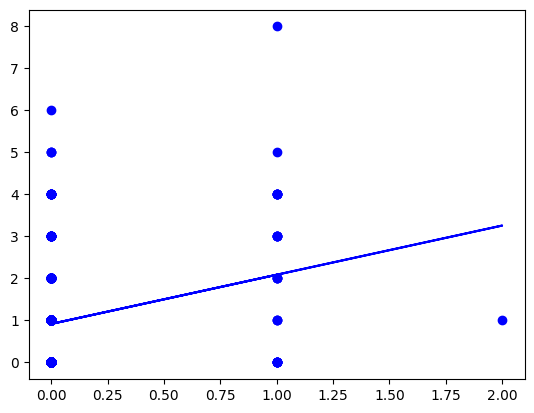

0.06567386539867748

In [ ]:
from sklearn.linear_model import LinearRegression

x = skilled.values.reshape(-1, 1)
y = vkilled
linear_model.fit(x,y)
y_hat = linear_model.predict(x)
plt.plot(x,y,'bo')
plt.plot(x,y_hat,'b')
plt.show()
linear_model.score(x,y)

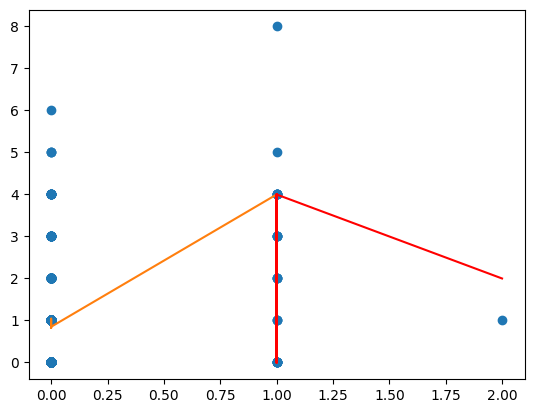

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth =3)

sdf = ndf.sort_values(by='Suspects Killed')

vkilled = sdf.loc[:, "Victims Killed"]
skilled = sdf.loc[:, "Suspects Killed"]

x = skilled.values.reshape(-1, 1)
y = vkilled.values

prev_value_features = [0] + y[:-1].tolist()
prev_value_features = np.array(prev_value_features).reshape(-1, 1)
combined_features = np.column_stack((x, prev_value_features))
xtrain = combined_features[:410,:]
model.fit(xtrain,ytrain)
yhat = model.predict(combined_features)
plt.plot(x,y,'o')
plt.plot(x[:410],yhat[:410])
plt.plot(x[410:],yhat[410:],'r')
plt.show()

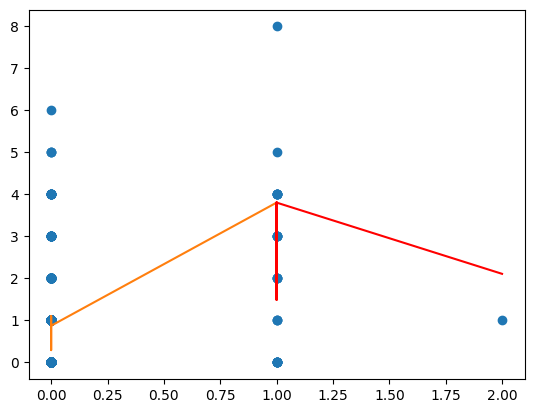

In [ ]:
from sklearn.ensemble import RandomForestRegressor
sdf = ndf.sort_values(by='Suspects Killed')

vkilled = sdf.loc[:, "Victims Killed"]
skilled = sdf.loc[:, "Suspects Killed"]

x = skilled.values.reshape(-1, 1)
y = vkilled.values

prev_value_features = [0] + y[:-1].tolist()
prev_value_features = np.array(prev_value_features).reshape(-1, 1)
combined_features = np.column_stack((x, prev_value_features))
xtrain = combined_features[:410, :]
ytrain = y[:410]

model = RandomForestRegressor()
model.fit(xtrain,ytrain) # xtrain has the matrix we made in the previous code box
yhat = model.predict(combined_features)
plt.plot(x,y,'o')
plt.plot(x[:410],yhat[:410])
plt.plot(x[410:],yhat[410:],'r')
plt.show()

In [ ]:
"""
Another association we saw from the correlation table is
"Suspects Injured" and "Suspects Arrested". We will run regression
for them also, and analyze their relationship.
"""

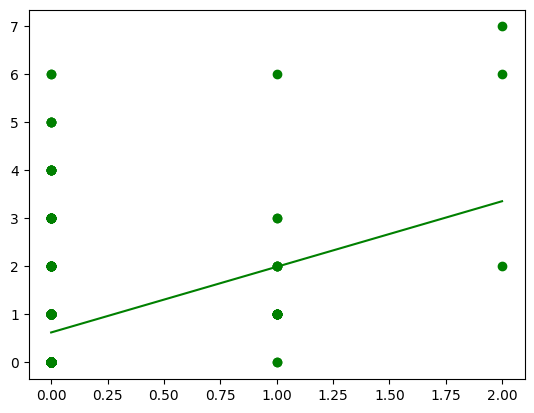

0.09885123350591951

In [ ]:
from sklearn.linear_model import LinearRegression

sinjured = sdf.loc[:, "Suspects Injured"]
sarrested = sdf.loc[:, "Suspects Arrested"]

linear_model = LinearRegression()

x = sinjured.values.reshape(-1, 1)
y = sarrested
linear_model.fit(x,y)
y_hat = linear_model.predict(x)
plt.plot(x,y,'go')
plt.plot(x,y_hat,'g')
plt.show()
linear_model.score(x,y)

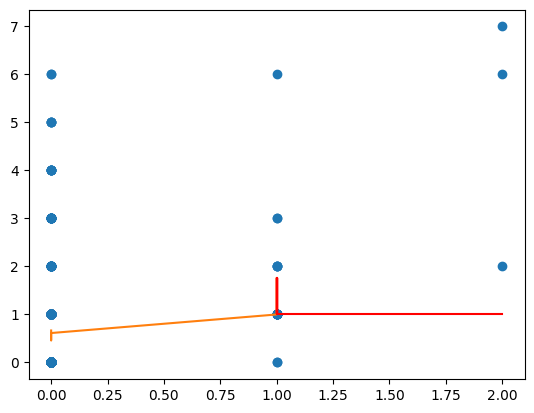

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth =3)

sdf = ndf.sort_values(by='Suspects Injured')


sinjured = sdf.loc[:, "Suspects Injured"]
sarrested = sdf.loc[:, "Suspects Arrested"]

x = sinjured.values.reshape(-1, 1)
y = sarrested.values

prev_value_features = [0] + y[:-1].tolist()
prev_value_features = np.array(prev_value_features).reshape(-1, 1)
combined_features = np.column_stack((x, prev_value_features))
xtrain = combined_features[:410,:]
model.fit(xtrain,ytrain)
yhat = model.predict(combined_features)
plt.plot(x,y,'o')
plt.plot(x[:410],yhat[:410])
plt.plot(x[410:],yhat[410:],'r')
plt.show()

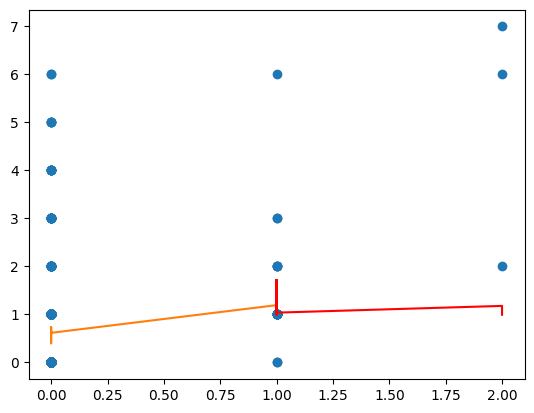

In [ ]:
from sklearn.ensemble import RandomForestRegressor

sdf = ndf.sort_values(by='Suspects Injured')

sinjured = sdf.loc[:, "Suspects Injured"]
sarrested = sdf.loc[:, "Suspects Arrested"]

x = sinjured.values.reshape(-1, 1)
y = sarrested.values

prev_value_features = [0] + y[:-1].tolist()
prev_value_features = np.array(prev_value_features).reshape(-1, 1)
combined_features = np.column_stack((x, prev_value_features))
xtrain = combined_features[:410, :]
ytrain = y[:410]

model = RandomForestRegressor()
model.fit(xtrain,ytrain) # xtrain has the matrix we made in the previous code box
yhat = model.predict(combined_features)
plt.plot(x,y,'o')
plt.plot(x[:410],yhat[:410])
plt.plot(x[410:],yhat[410:],'r')
plt.show()

**We want to analyze the association between: Victims Injured(x) and Victims Killed(y), Suspects Killed(x) and Victims Killed(y), Suspects Injured(x) and Suspects Arrested(y). We ran three regressions for each of those three relationships, using linear regressions, DecisionTreeRegressor, and RandomForest Regressor.**


1.   For Victims Injured(x) and Victims Killed(y), we discover a generally negative association, with its tail tapering off on the right side approximately along y = 1. We can say its closer to a quadratic relationship. From this, we can make the hypothesis that the number of victims killed is likely to be higher when the number of victims injured is low. Although the hypothesis is counterintuitive, we can explain it because as the degree of violence escalate, the criminal is more likely to shoot someone more than once and at more fatal spots, resulting more victims to be killed, and less injured but survived.
2.   For Suspects Killed(x) and Victims Killed(y), we see a slight positive trend on the linear regression, but on the other two graphs it looks more like a bell shaped curve. centering at x = 1. This pattern could occur due to the nature of the incidents:

*   Low x-values (0 suspects killed): These could represent less severe incidents where fewer victims are harmed or killed.
*   x = 1 (Center of the Bell Curve): This might represent incidents where there is a confrontation, leading to both suspect fatalities and higher victim fatalities.
*   High x-values (2 or more suspects killed): These could represent scenarios where the focus shifts to neutralizing the threat by killing multiple suspects, possibly reducing the number of additional victim casualties.
*   This curve peaks at x = 1, indicating that the number of victims killed might increase when exactly one suspect is killed, due to the scenario decribed above.
3.   For Suspects Injured(x) and Suspects Arrested(y), there is a fairly linear positive relationship, and has the best R^2 for the linear regression among the all three pairs of relationships. This one is the most straight foward to explain, as if the suspects are injured, they would be less mobile and active, therefore easier to arrest. Therefore, it makes sense the number of suspects injured is positively associated with the number of suspects arrested.
